# TED TALK DATA SET

## Author : Ayo Oyebade  (A response to Kevin Markham PYCON 2019 Lecture)

## data source : 
### https://www.kaggle.com/rounakbanik/ted-talks

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
#read data set
ted = pd.read_csv("data/ted_main.csv")

In [35]:
ted.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292


In [36]:
ted.shape


(2550, 17)

In [37]:
ted.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


In [38]:
ted.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

## QUES 1. Which talks provoke the most online discussion? 

In [39]:
ted.sort_values("comments").tail(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792


In [40]:
#Make provision for biases in comment vis-a-vis view
ted["comments_per_view"] = ted.comments/ted.views

In [41]:
ted.sort_values("comments_per_view").tail(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220


## QUES 2 : Visualize the distribution of comments

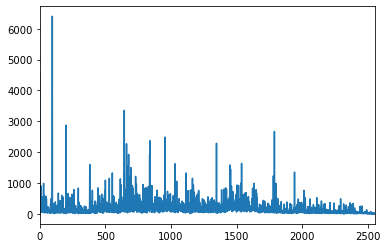

In [42]:
ted.comments.plot()

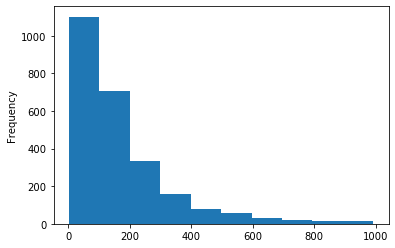

In [43]:
#Remove comments above 1,000

ted[ted.comments<1000].comments.plot(kind='hist')

## QUES 3 : Plot the number of talks that took place each year

In [44]:
#show top 3 dates of filming

ted["film_date"].head(3)

0    1140825600
1    1140825600
2    1140739200
Name: film_date, dtype: int64

In [45]:
#make the date reader friendly

pd.to_datetime(ted.film_date, unit="s").head

<bound method NDFrame.head of 0      2006-02-25
1      2006-02-25
2      2006-02-24
3      2006-02-26
4      2006-02-22
          ...    
2545   2017-06-06
2546   2017-04-24
2547   2017-04-24
2548   2017-07-08
2549   2017-04-24
Name: film_date, Length: 2550, dtype: datetime64[ns]>

In [46]:
#create parameter

ted["film_date_time"] = pd.to_datetime(ted.film_date, unit="s")

In [47]:
#confirm that film date is equivalent to the ted evnt

ted[["event", "film_date_time"]].sample(5)

,event,film_date_time
702,TEDxUSC,2010-04-13
113,TED2002,2002-02-02
471,TED@State,2009-06-03
314,TED2004,2004-02-02
1702,TED2014,2014-03-18


In [49]:
ted.film_date_time.dt.year.head(3)

0    2006
1    2006
2    2006
Name: film_date_time, dtype: int64

In [50]:
ted.film_date_time.dt.year.value_counts()

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2003     33
2004     33
2002     27
1998      6
2001      5
1983      1
1991      1
1994      1
1990      1
1984      1
1972      1
Name: film_date_time, dtype: int64